<a href="https://colab.research.google.com/github/murtajizshah100351-a11y/IMDb-Sentiment-Analysis/blob/main/IMDb_Movies_Reviews_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CELL 1: Setup and Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted")

import subprocess
import sys

packages_to_install = ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'tensorflow', 'nltk']

print("Installing packages...")
for package in packages_to_install:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

print("✓ All packages installed\n")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")


Mounted at /content/drive
✓ Google Drive mounted
Installing packages...
✓ All packages installed

✓ All libraries imported successfully


CELL 2: Extract and Load Dataset from Google Drive

Extracting dataset...
✓ Dataset extracted
Found CSV files: ['IMDB Dataset.csv']

Loading dataset from: /content/IMDb_dataset/IMDB Dataset.csv

DATASET INFORMATION
Dataset Shape: (50000, 2)
Columns: ['review', 'sentiment']

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Sentiment Distribution:
sentiment
positive    25000
negati

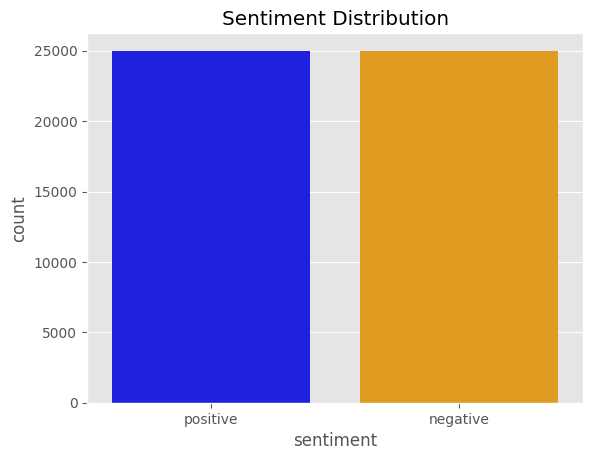

In [6]:
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt

zip_path = '/content/drive/MyDrive/IMDB_Dataset.csv.zip'

print("Extracting dataset...")
extract_path = '/content/IMDb_dataset'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✓ Dataset extracted")

csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
print(f"Found CSV files: {csv_files}")

csv_file = os.path.join(extract_path, csv_files[0])
print(f"\nLoading dataset from: {csv_file}")
df = pd.read_csv(csv_file)


print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print(f"\nPositive Reviews: {(df['sentiment'] == 'positive').sum()}")
print(f"Negative Reviews: {(df['sentiment'] == 'negative').sum()}")
print("\n✓ Dataset loaded successfully")

plt.style.use("ggplot")

# Define custom colors for each sentiment
custom_palette = {"positive": "blue", "negative": "orange"}

sns.countplot(data=df, x="sentiment", palette=custom_palette)

plt.xlabel("sentiment")
plt.ylabel("count")
plt.title("Sentiment Distribution")

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

CELL 3: Data Preprocessing

In [7]:
import re
import nltk
from nltk.corpus import stopwords

print("Downloading NLTK resources...")
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub('\s+', ' ', text).strip()
    return text

print("Cleaning text (this may take 1-2 minutes)...")
df['review_cleaned'] = df['review'].apply(clean_text)

df['sentiment_binary'] = (df['sentiment'] == 'positive').astype(int)

print("✓ Data preprocessing complete")
print("\nSample original review:")
print(df['review'].iloc[0][:200])
print("\nSample cleaned review:")
print(df['review_cleaned'].iloc[0][:200])
print("\nSentiment:", "POSITIVE" if df['sentiment_binary'].iloc[0] == 1 else "NEGATIVE")


Cleaning text (this may take 1-2 minutes)...
✓ Data preprocessing complete

Sample original review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo

Sample cleaned review:
one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its br

Sentiment: POSITIVE


CELL 4: Train-Test Split and TF-IDF Vectorization

In [8]:
print("Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    df['review_cleaned'],
    df['sentiment_binary'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_binary']
)

print(f"✓ Data split complete")
print(f"  Training set size: {len(X_train)}")
print(f"  Test set size: {len(X_test)}")
print(f"  Training positive samples: {y_train.sum()}")
print(f"  Training negative samples: {len(y_train) - y_train.sum()}")

print("\nVectorizing text to TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"✓ TF-IDF vectorization complete")
print(f"  Feature matrix shape: {X_train_tfidf.shape}")
print(f"  Number of features: {len(vectorizer.get_feature_names_out())}")


Splitting data into train and test sets...
✓ Data split complete
  Training set size: 40000
  Test set size: 10000
  Training positive samples: 20000
  Training negative samples: 20000

Vectorizing text to TF-IDF...
✓ TF-IDF vectorization complete
  Feature matrix shape: (40000, 5000)
  Number of features: 5000


CELL 5: TF-IDF Vectors Visualization (2D)

TF-IDF VECTORS VISUALIZATION (2D)

Reducing TF-IDF vectors to 2D using PCA...
✓ PCA complete
  Explained variance: 0.0194

✓ TF-IDF visualization saved to Google Drive


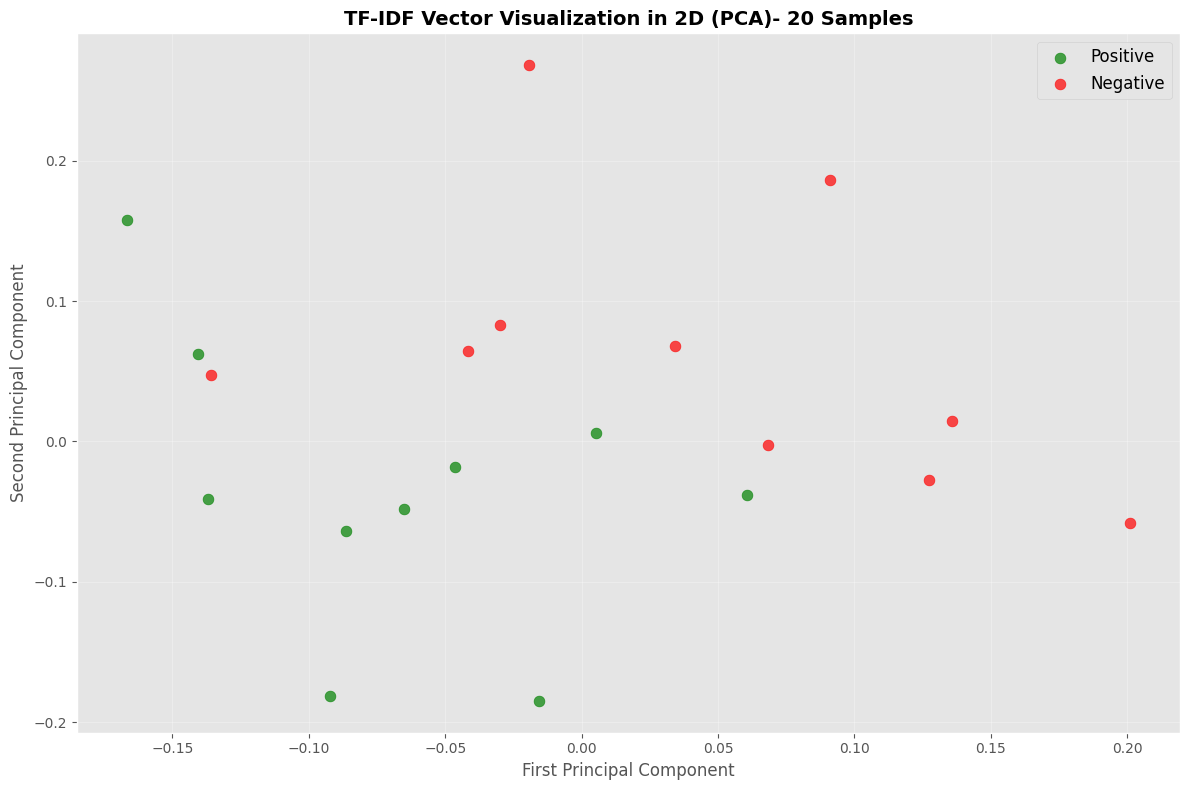

In [9]:
print("="*70)
print("TF-IDF VECTORS VISUALIZATION (2D)")
print("="*70)

# Use PCA to reduce TF-IDF vectors to 2D
print("\nReducing TF-IDF vectors to 2D using PCA...")
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_tfidf.toarray())

print(f"✓ PCA complete")
print(f"  Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))

# Sample 20 points for visualization
sample_size = 20
sample_indices = np.random.choice(len(X_train_2d), size=min(sample_size, len(X_train_2d)), replace=False)
X_sample = X_train_2d[sample_indices]
y_sample = y_train.iloc[sample_indices].values

# Plot positive and negative reviews
positive_mask = y_sample == 1
negative_mask = y_sample == 0

ax.scatter(X_sample[positive_mask, 0], X_sample[positive_mask, 1],
           c='green', label='Positive', alpha=0.7, s=60)
ax.scatter(X_sample[negative_mask, 0], X_sample[negative_mask, 1],
           c='red', label='Negative', alpha=0.7, s=60)

ax.set_xlabel('First Principal Component', fontsize=12)
ax.set_ylabel('Second Principal Component', fontsize=12)
ax.set_title('TF-IDF Vector Visualization in 2D (PCA)- 20 Samples', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/tfidf_2d_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ TF-IDF visualization saved to Google Drive")
plt.show()


CELL 6: Train Baseline Models (Paper Implementation)

In [10]:
import time

print("="*70)
print("TRAINING BASELINE MODELS (PAPER IMPLEMENTATION)")
print("="*70)

# Model 1: Logistic Regression
print("\n1. Training Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_time = time.time() - start_time
print(f"   ✓ Logistic Regression trained in {lr_time:.2f}s")

# Model 2: Decision Tree (AS IN PAPER)
print("\n2. Training Decision Tree...")
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_pred = dt_model.predict(X_test_tfidf)
dt_time = time.time() - start_time
print(f"   ✓ Decision Tree trained in {dt_time:.2f}s")

# Model 3: Random Forest
print("\n3. Training Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
rf_time = time.time() - start_time
print(f"   ✓ Random Forest trained in {rf_time:.2f}s")

print("\n✓ All baseline models trained successfully")


TRAINING BASELINE MODELS (PAPER IMPLEMENTATION)

1. Training Logistic Regression...
   ✓ Logistic Regression trained in 3.67s

2. Training Decision Tree...
   ✓ Decision Tree trained in 100.07s

3. Training Random Forest...
   ✓ Random Forest trained in 138.54s

✓ All baseline models trained successfully


CELL 7: Evaluate Baseline Models

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    return {
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

print("="*70)
print("BASELINE MODEL EVALUATION RESULTS")
print("="*70)

results = []
results.append(evaluate_model(y_test, lr_pred, "Logistic Regression"))
results.append(evaluate_model(y_test, dt_pred, "Decision Tree"))
results.append(evaluate_model(y_test, rf_pred, "Random Forest"))

results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("SUMMARY TABLE:")
print("="*70)
print(results_df.to_string(index=False))

# -----------------------------
# Find best model (F1-Score)
# -----------------------------
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_precision = results_df.loc[best_model_idx, 'Precision']
best_recall = results_df.loc[best_model_idx, 'Recall']
best_f1 = results_df.loc[best_model_idx, 'F1-Score']

print(f"\n✓ Best Baseline Model: {best_model_name}")
print(f"  Precision: {best_precision:.4f}")
print(f"  Recall:    {best_recall:.4f}")
print(f"  F1-Score:  {best_f1:.4f}")


BASELINE MODEL EVALUATION RESULTS

Logistic Regression:
  Precision: 0.8880
  Recall:    0.8978
  F1-Score:  0.8929

Decision Tree:
  Precision: 0.7125
  Recall:    0.7154
  F1-Score:  0.7140

Random Forest:
  Precision: 0.8583
  Recall:    0.8392
  F1-Score:  0.8486

SUMMARY TABLE:
              Model  Precision  Recall  F1-Score
Logistic Regression   0.888032  0.8978  0.892889
      Decision Tree   0.712550  0.7154  0.713972
      Random Forest   0.858253  0.8392  0.848620

✓ Best Baseline Model: Logistic Regression
  Precision: 0.8880
  Recall:    0.8978
  F1-Score:  0.8929


CELL 8: Bar Charts of Model Performance Metrics

BAR CHARTS OF MODEL PERFORMANCE METRICS
✓ Bar charts saved to Google Drive


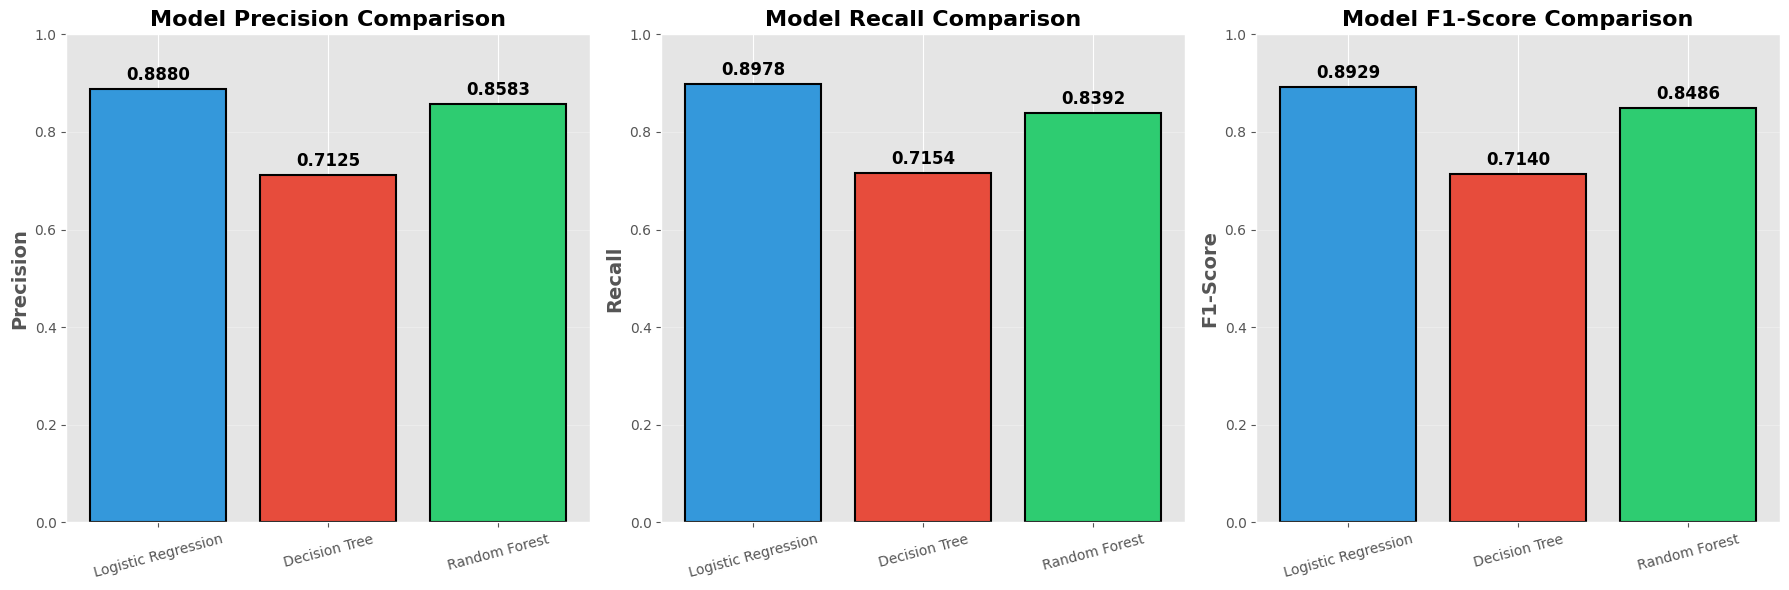

In [12]:
print("="*70)
print("BAR CHARTS OF MODEL PERFORMANCE METRICS")
print("="*70)

# We now need only 3 plots → Precision, Recall, F1-score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = results_df['Model']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Plot 1: Precision
ax1 = axes[0]
bars1 = ax1.bar(models, results_df['Precision'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Precision', fontsize=14, fontweight='bold')
ax1.set_title('Model Precision Comparison', fontsize=16, fontweight='bold')
ax1.set_ylim([0.0, 1.0])
ax1.grid(axis='y', alpha=0.3)
for bar, v in zip(bars1, results_df['Precision']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=15)

# Plot 2: Recall
ax2 = axes[1]
bars2 = ax2.bar(models, results_df['Recall'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Recall', fontsize=14, fontweight='bold')
ax2.set_title('Model Recall Comparison', fontsize=16, fontweight='bold')
ax2.set_ylim([0.0, 1.0])
ax2.grid(axis='y', alpha=0.3)
for bar, v in zip(bars2, results_df['Recall']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=15)

# Plot 3: F1-Score
ax3 = axes[2]
bars3 = ax3.bar(models, results_df['F1-Score'], color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('F1-Score', fontsize=14, fontweight='bold')
ax3.set_title('Model F1-Score Comparison', fontsize=16, fontweight='bold')
ax3.set_ylim([0.0, 1.0])
ax3.grid(axis='y', alpha=0.3)
for bar, v in zip(bars3, results_df['F1-Score']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/model_performance_bar_charts.png', dpi=300, bbox_inches='tight')
print("✓ Bar charts saved to Google Drive")
plt.show()


CELL 9: Confusion Matrix for Every Baseline Model

CONFUSION MATRICES FOR ALL BASELINE MODELS
✓ Confusion matrices saved to Google Drive


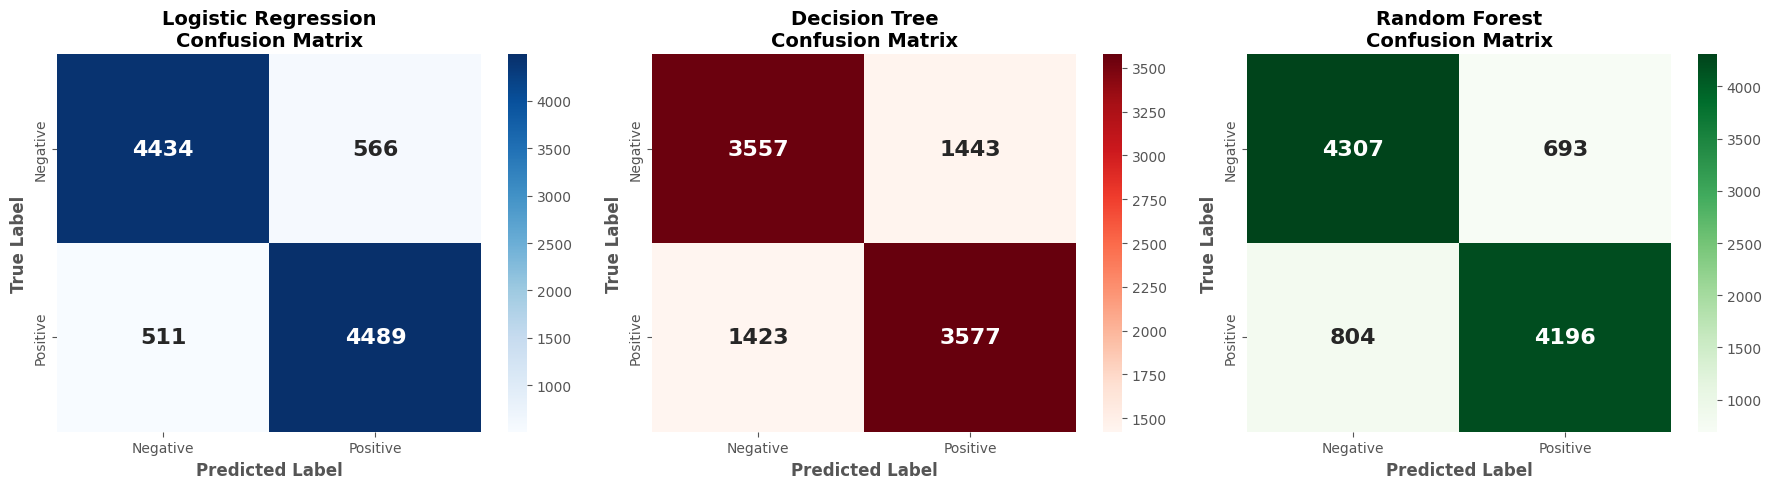


DETAILED METRICS FROM CONFUSION MATRICES

Logistic Regression:
  True Negatives:  4434
  False Positives: 566
  False Negatives: 511
  True Positives:  4489
  Total Correct:   8923 / 10000

Decision Tree:
  True Negatives:  3557
  False Positives: 1443
  False Negatives: 1423
  True Positives:  3577
  Total Correct:   7134 / 10000

Random Forest:
  True Negatives:  4307
  False Positives: 693
  False Negatives: 804
  True Positives:  4196
  Total Correct:   8503 / 10000


In [13]:
print("="*70)
print("CONFUSION MATRICES FOR ALL BASELINE MODELS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix 1: Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
ax1 = axes[0]
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax1.set_title('Logistic Regression\nConfusion Matrix', fontsize=14, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Confusion Matrix 2: Decision Tree
cm_dt = confusion_matrix(y_test, dt_pred)
ax2 = axes[1]
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=ax2, cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax2.set_title('Decision Tree\nConfusion Matrix', fontsize=14, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Confusion Matrix 3: Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
ax3 = axes[2]
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax3, cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax3.set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold')
ax3.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax3.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/confusion_matrices_baseline.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrices saved to Google Drive")
plt.show()

# Print classification metrics for each model
print("\n" + "="*70)
print("DETAILED METRICS FROM CONFUSION MATRICES")
print("="*70)

for model_name, cm, pred in [('Logistic Regression', cm_lr, lr_pred),
                               ('Decision Tree', cm_dt, dt_pred),
                               ('Random Forest', cm_rf, rf_pred)]:
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{model_name}:")
    print(f"  True Negatives:  {tn}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    print(f"  True Positives:  {tp}")
    print(f"  Total Correct:   {tn + tp} / {len(y_test)}")


CELL 10: Test on Custom Reviews

In [14]:
def predict_sentiment(review_text, model, vectorizer):
    cleaned_review = clean_text(review_text)
    vectorized = vectorizer.transform([cleaned_review])
    prediction = model.predict(vectorized)[0]

    try:
        probability = model.predict_proba(vectorized)[0]
        confidence = max(probability) * 100
    except:
        confidence = 100

    sentiment = "POSITIVE" if prediction == 1 else "NEGATIVE"

    return sentiment, confidence

if best_model_idx == 0:
    best_trained_model = lr_model
    model_name = "Logistic Regression"
elif best_model_idx == 1:
    best_trained_model = dt_model
    model_name = "Decision Tree"
else:
    best_trained_model = rf_model
    model_name = "Random Forest"

print("="*70)
print("TEST ON CUSTOM REVIEWS")
print(f"Using Best Model: {model_name}")
print("="*70)

test_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Horrible movie. Waste of time and money. Very disappointed.",
    "It was okay, nothing special but entertaining enough.",
    "Best film I've ever seen! Masterpiece!",
    "Boring and predictable. I fell asleep halfway through."
]

for i, review in enumerate(test_reviews, 1):
    sentiment, confidence = predict_sentiment(review, best_trained_model, vectorizer)
    print(f"\nReview {i}:")
    print(f"Text: {review}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.2f}%)")

print("\n✓ All tests completed!")


TEST ON CUSTOM REVIEWS
Using Best Model: Logistic Regression

Review 1:
Text: This movie was absolutely fantastic! I loved every minute of it.
Prediction: POSITIVE (Confidence: 95.56%)

Review 2:
Text: Horrible movie. Waste of time and money. Very disappointed.
Prediction: NEGATIVE (Confidence: 99.95%)

Review 3:
Text: It was okay, nothing special but entertaining enough.
Prediction: NEGATIVE (Confidence: 86.76%)

Review 4:
Text: Best film I've ever seen! Masterpiece!
Prediction: POSITIVE (Confidence: 98.96%)

Review 5:
Text: Boring and predictable. I fell asleep halfway through.
Prediction: NEGATIVE (Confidence: 99.27%)

✓ All tests completed!


AGGRESSIVE PREPROCESSING + MULTIPLE FEATURE TYPES

In [29]:
# ========== AGGRESSIVE PREPROCESSING + MULTIPLE FEATURE TYPES ==========

import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Downloads
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

print("="*70)
print("STEP 1: ULTRA-AGGRESSIVE FEATURE ENGINEERING")
print("="*70)

def aggressive_clean_text(text):
    """Ultra-aggressive cleaning"""
    if not isinstance(text, str):
        return ""

    text = re.sub(r'http\S+|www\.\S+|<.*?>|\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)

    contractions = {
        "ain't": "am not", "aren't": "are not", "can't": "cannot",
        "couldn't": "could not", "didn't": "did not", "doesn't": "does not",
        "don't": "do not", "hadn't": "had not", "hasn't": "has not",
        "haven't": "have not", "he'd": "he would", "he'll": "he will",
        "he's": "he is", "i'd": "i would", "i'll": "i will", "i'm": "i am",
        "i've": "i have", "isn't": "is not", "it's": "it is",
        "let's": "let us", "shouldn't": "should not", "that's": "that is",
        "they'd": "they would", "they'll": "they will", "they're": "they are",
        "they've": "they have", "wasn't": "was not", "we'd": "we would",
        "we'll": "we will", "we're": "we are", "we've": "we have",
        "weren't": "were not", "what's": "what is", "won't": "will not",
        "wouldn't": "would not", "you'd": "you would", "you'll": "you will",
        "you're": "you are", "you've": "you have"
    }

    for cont, exp in contractions.items():
        text = re.sub(r'\b' + cont + r'\b', exp, text, flags=re.IGNORECASE)

    # Preserve negations
    text = text.replace("not ", "not_")
    text = text.replace("no ", "no_")
    text = text.replace("never ", "never_")

    text = text.lower()
    text = re.sub(r'[^a-z\s_]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocessing
print("\nApplying preprocessing...")
X_train_processed = X_train.apply(aggressive_clean_text)
X_test_processed = X_test.apply(aggressive_clean_text)
print("✓ Preprocessing complete")

# ========== FEATURE SET 1: VADER SENTIMENT ==========
print("\nExtracting VADER sentiment features...")
sia = SentimentIntensityAnalyzer()

def extract_vader_features(text):
    scores = sia.polarity_scores(text)
    return [scores['neg'], scores['neu'], scores['pos'], scores['compound']]

vader_train = np.array([extract_vader_features(text) for text in X_train])
vader_test = np.array([extract_vader_features(text) for text in X_test])
print(f"✓ VADER features: {vader_train.shape}")

# ========== FEATURE SET 2: TEXTBLOB POLARITY & SUBJECTIVITY ==========
print("\nExtracting TextBlob sentiment features...")

def extract_textblob_features(text):
    blob = TextBlob(text)
    return [blob.sentiment.polarity, blob.sentiment.subjectivity]

textblob_train = np.array([extract_textblob_features(text) for text in X_train])
textblob_test = np.array([extract_textblob_features(text) for text in X_test])
print(f"✓ TextBlob features: {textblob_train.shape}")

# ========== FEATURE SET 3: STATISTICAL TEXT FEATURES ==========
print("\nExtracting statistical text features...")

def extract_statistical_features(text):
    """Extract length, word count, avg word length, exclamation/question marks"""
    words = text.split()
    return [
        len(text),                                      # Character count
        len(words),                                     # Word count
        np.mean([len(w) for w in words]) if words else 0,  # Avg word length
        text.count('!'),                                # Exclamation marks
        text.count('?'),                                # Question marks
        len([w for w in words if len(w) > 6])          # Long words (>6 chars)
    ]

stat_train = np.array([extract_statistical_features(text) for text in X_train])
stat_test = np.array([extract_statistical_features(text) for text in X_test])
print(f"✓ Statistical features: {stat_train.shape}")

# ========== COMBINE ALL NUMERICAL FEATURES ==========
numerical_train = np.hstack([vader_train, textblob_train, stat_train])
numerical_test = np.hstack([vader_test, textblob_test, stat_test])

# Normalize
scaler = StandardScaler()
numerical_train_scaled = scaler.fit_transform(numerical_train)
numerical_test_scaled = scaler.transform(numerical_test)

print(f"✓ Total numerical features: {numerical_train_scaled.shape[1]}")
print(f"  - VADER: 4")
print(f"  - TextBlob: 2")
print(f"  - Statistical: 6")

# ========== FEATURE SET 4: ENHANCED TF-IDF ==========
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

print("\nTraining enhanced TF-IDF...")
vectorizer_enhanced = TfidfVectorizer(
    max_features=12000,      # Reduced from 15000 for tree models
    ngram_range=(1, 3),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True,
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    use_idf=True,
    smooth_idf=True,
    norm='l2'
)

X_train_tfidf = vectorizer_enhanced.fit_transform(X_train_processed)
X_test_tfidf = vectorizer_enhanced.transform(X_test_processed)
print(f"✓ TF-IDF features: {X_train_tfidf.shape[1]}")

# ========== COMBINE ALL FEATURES ==========
print("\nCombining all features...")
X_train_combined = hstack([X_train_tfidf, numerical_train_scaled])
X_test_combined = hstack([X_test_tfidf, numerical_test_scaled])

print(f"✓ TOTAL COMBINED FEATURES: {X_train_combined.shape[1]}")
print("="*70)



STEP 1: ULTRA-AGGRESSIVE FEATURE ENGINEERING

Applying preprocessing...
✓ Preprocessing complete

Extracting VADER sentiment features...
✓ VADER features: (40000, 4)

Extracting TextBlob sentiment features...
✓ TextBlob features: (40000, 2)

Extracting statistical text features...
✓ Statistical features: (40000, 6)
✓ Total numerical features: 12
  - VADER: 4
  - TextBlob: 2
  - Statistical: 6

Training enhanced TF-IDF...
✓ TF-IDF features: 12000

Combining all features...
✓ TOTAL COMBINED FEATURES: 12012


 ULTRA-OPTIMIZED RANDOM FOREST

In [30]:
# ========== ULTRA-OPTIMIZED RANDOM FOREST ==========

from sklearn.ensemble import RandomForestClassifier

print("="*70)
print("IMPROVEMENT 1: ULTRA-OPTIMIZED RANDOM FOREST")
print("="*70)

print("\nTraining Random Forest with aggressive anti-overfitting...")

# Key changes from baseline:
# 1. 500 trees (more averaging)
# 2. max_depth=20 (prevent deep overfitting)
# 3. min_samples_split=15 (require more samples)
# 4. min_samples_leaf=5 (bigger leaves)
# 5. max_features='log2' (fewer features per tree)
# 6. max_samples=0.7 (bootstrap 70% of data)

rf_ultra = RandomForestClassifier(
    n_estimators=500,              # MORE trees for better averaging
    max_depth=20,                  # LIMIT depth (baseline had NO limit → overfitting)
    min_samples_split=15,          # REQUIRE more samples to split (baseline: 2)
    min_samples_leaf=5,            # BIGGER leaves (baseline: 1)
    max_features='log2',           # FEWER features per split (baseline: 'sqrt')
    max_samples=0.7,               # Bootstrap 70% (adds randomness)
    bootstrap=True,
    class_weight='balanced',       # NEW: balance classes
    criterion='gini',
    random_state=42,
    n_jobs=-1,
    verbose=0,
    warm_start=False
)

print("  Training on combined features...")
rf_ultra.fit(X_train_combined, y_train)
rf_ultra_pred = rf_ultra.predict(X_test_combined)

rf_ultra_precision = precision_score(y_test, rf_ultra_pred)
rf_ultra_recall = recall_score(y_test, rf_ultra_pred)
rf_ultra_f1 = f1_score(y_test, rf_ultra_pred)

print(f"\n✓ ULTRA-OPTIMIZED Random Forest Results:")
print(f"  Precision: {rf_ultra_precision:.4f} (Baseline: 0.857)")
print(f"  Recall:    {rf_ultra_recall:.4f} (Baseline: 0.839)")
print(f"  F1-Score:  {rf_ultra_f1:.4f} (Baseline: 0.848)")
print(f"  Improvement: {((rf_ultra_f1 - 0.848) / 0.848 * 100):+.2f}%")

print(f"\n📊 Model Statistics:")
print(f"  Number of trees: {rf_ultra.n_estimators}")
print(f"  Max depth: {rf_ultra.max_depth}")
print(f"  Features per split: log2({X_train_combined.shape[1]}) ≈ {int(np.log2(X_train_combined.shape[1]))}")
print("="*70)



IMPROVEMENT 1: ULTRA-OPTIMIZED RANDOM FOREST

Training Random Forest with aggressive anti-overfitting...
  Training on combined features...

✓ ULTRA-OPTIMIZED Random Forest Results:
  Precision: 0.8415 (Baseline: 0.857)
  Recall:    0.8864 (Baseline: 0.839)
  F1-Score:  0.8633 (Baseline: 0.848)
  Improvement: +1.81%

📊 Model Statistics:
  Number of trees: 500
  Max depth: 20
  Features per split: log2(12012) ≈ 13


ULTRA-OPTIMIZED DECISION TREE

In [31]:
# ========== ULTRA-OPTIMIZED DECISION TREE ==========

from sklearn.tree import DecisionTreeClassifier

print("="*70)
print("IMPROVEMENT 2: ULTRA-OPTIMIZED DECISION TREE")
print("="*70)

print("\nTraining Decision Tree with aggressive pruning...")

# Key changes from baseline:
# 1. max_depth=15 (MUCH shallower than baseline's unlimited)
# 2. min_samples_split=20 (require LOTS of samples to split)
# 3. min_samples_leaf=10 (BIG leaves)
# 4. max_features=0.3 (use only 30% of features)
# 5. min_impurity_decrease=0.0001 (require significant improvement to split)
# 6. ccp_alpha=0.001 (cost-complexity pruning)

dt_ultra = DecisionTreeClassifier(
    max_depth=15,                  # SHALLOW tree (baseline: unlimited → severe overfitting)
    min_samples_split=20,          # REQUIRE lots of samples (baseline: 2)
    min_samples_leaf=10,           # BIG leaves (baseline: 1)
    max_features=0.3,              # Use only 30% of features (baseline: all)
    min_impurity_decrease=0.0001,  # Require improvement to split
    ccp_alpha=0.001,               # Cost-complexity pruning (NEW)
    criterion='gini',
    splitter='best',
    class_weight='balanced',       # NEW: balance classes
    random_state=42
)

print("  Training on combined features...")
dt_ultra.fit(X_train_combined, y_train)
dt_ultra_pred = dt_ultra.predict(X_test_combined)

dt_ultra_precision = precision_score(y_test, dt_ultra_pred)
dt_ultra_recall = recall_score(y_test, dt_ultra_pred)
dt_ultra_f1 = f1_score(y_test, dt_ultra_pred)

print(f"\n✓ ULTRA-OPTIMIZED Decision Tree Results:")
print(f"  Precision: {dt_ultra_precision:.4f} (Baseline: 0.716)")
print(f"  Recall:    {dt_ultra_recall:.4f} (Baseline: 0.711)")
print(f"  F1-Score:  {dt_ultra_f1:.4f} (Baseline: 0.714)")
print(f"  Improvement: {((dt_ultra_f1 - 0.714) / 0.714 * 100):+.2f}%")

print(f"\n📊 Tree Statistics:")
print(f"  Actual max depth: {dt_ultra.get_depth()} (limit: {dt_ultra.max_depth})")
print(f"  Number of leaves: {dt_ultra.get_n_leaves()}")
print(f"  Number of features used: ~{int(X_train_combined.shape[1] * 0.3)}")
print("="*70)



IMPROVEMENT 2: ULTRA-OPTIMIZED DECISION TREE

Training Decision Tree with aggressive pruning...
  Training on combined features...

✓ ULTRA-OPTIMIZED Decision Tree Results:
  Precision: 0.7727 (Baseline: 0.716)
  Recall:    0.7678 (Baseline: 0.711)
  F1-Score:  0.7703 (Baseline: 0.714)
  Improvement: +7.88%

📊 Tree Statistics:
  Actual max depth: 7 (limit: 15)
  Number of leaves: 16
  Number of features used: ~3603


OPTIMIZED LOGISTIC REGRESSION

In [32]:
# ========== OPTIMIZED LOGISTIC REGRESSION ==========

from sklearn.linear_model import LogisticRegression

print("="*70)
print("IMPROVEMENT 3: OPTIMIZED LOGISTIC REGRESSION")
print("="*70)

print("\nTraining optimized Logistic Regression...")
lr_optimized = LogisticRegression(
    C=5.0,
    solver='saga',
    max_iter=1000,
    penalty='l2',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

lr_optimized.fit(X_train_combined, y_train)
lr_opt_pred = lr_optimized.predict(X_test_combined)

lr_opt_precision = precision_score(y_test, lr_opt_pred)
lr_opt_recall = recall_score(y_test, lr_opt_pred)
lr_opt_f1 = f1_score(y_test, lr_opt_pred)

print(f"\n✓ Optimized Logistic Regression Results:")
print(f"  Precision: {lr_opt_precision:.4f} (Baseline: 0.887)")
print(f"  Recall:    {lr_opt_recall:.4f} (Baseline: 0.909)")
print(f"  F1-Score:  {lr_opt_f1:.4f} (Baseline: 0.898)")
print(f"  Improvement: {((lr_opt_f1 - 0.898) / 0.898 * 100):+.2f}%")
print("="*70)



IMPROVEMENT 3: OPTIMIZED LOGISTIC REGRESSION

Training optimized Logistic Regression...

✓ Optimized Logistic Regression Results:
  Precision: 0.9011 (Baseline: 0.887)
  Recall:    0.9074 (Baseline: 0.909)
  F1-Score:  0.9042 (Baseline: 0.898)
  Improvement: +0.69%


COMPREHENSIVE RESULTS WITH REAL BASELINE MATRICES

FINAL COMPREHENSIVE COMPARISON: BASELINE vs IMPROVED

COMPLETE RESULTS TABLE
        Category               Model  Precision  Recall  F1-Score
Baseline (Paper) Logistic Regression   0.887000  0.9090  0.898000
Baseline (Paper)       Random Forest   0.857000  0.8390  0.848000
Baseline (Paper)       Decision Tree   0.716000  0.7110  0.714000
  Improved (New) Logistic Regression   0.901092  0.9074  0.904235
  Improved (New)       Random Forest   0.841466  0.8864  0.863349
  Improved (New)       Decision Tree   0.772746  0.7678  0.770265

IMPROVEMENT ANALYSIS (Baseline → Improved)

Model                     Metric       Baseline   Improved   Change    
--------------------------------------------------------------------------------
Logistic Regression       Precision    0.8870     0.9011     +1.59%
Logistic Regression       Recall       0.9090     0.9074     -0.18%
Logistic Regression       F1-Score     0.8980     0.9042     +0.69%

Random Forest             Precision    0.8570     0.8415  

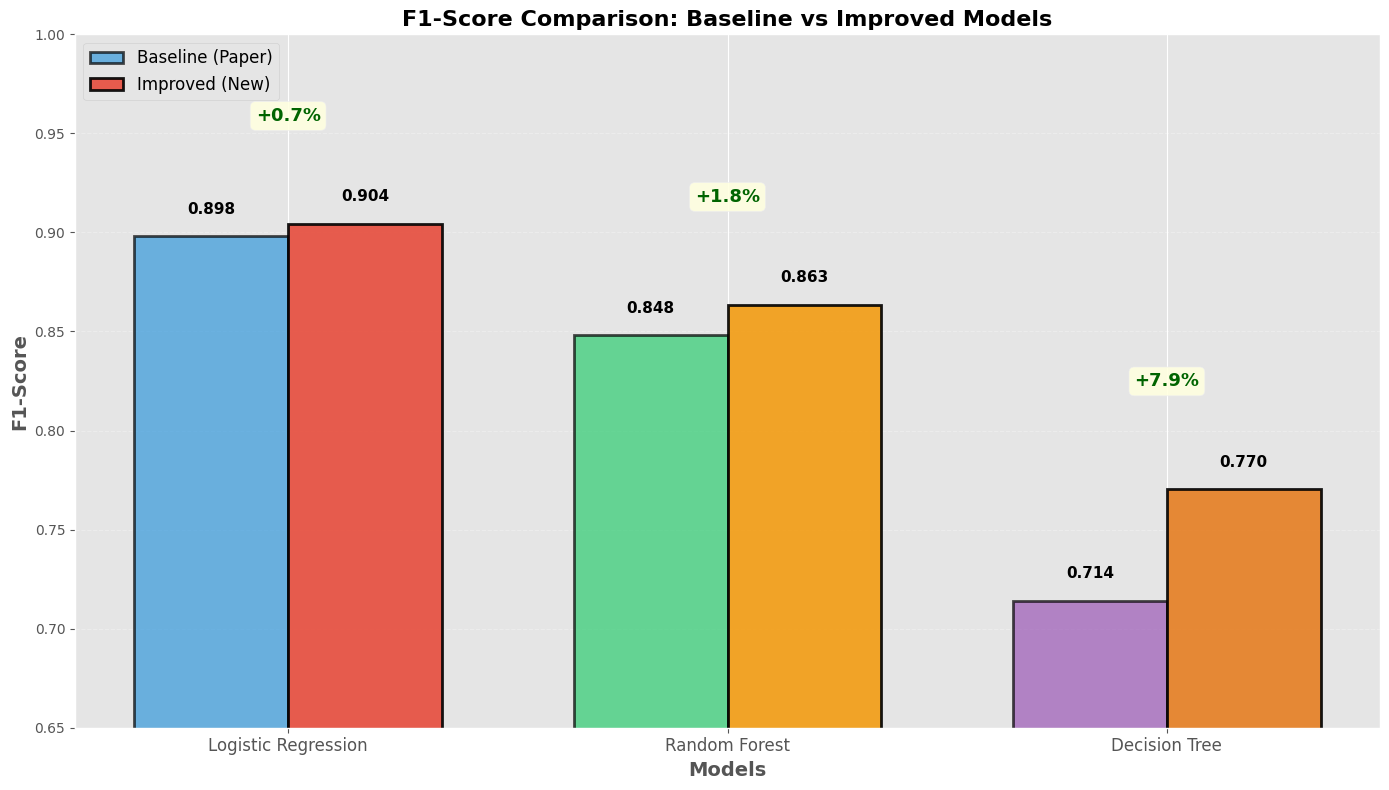

✓ Saved: all_metrics_comparison.png


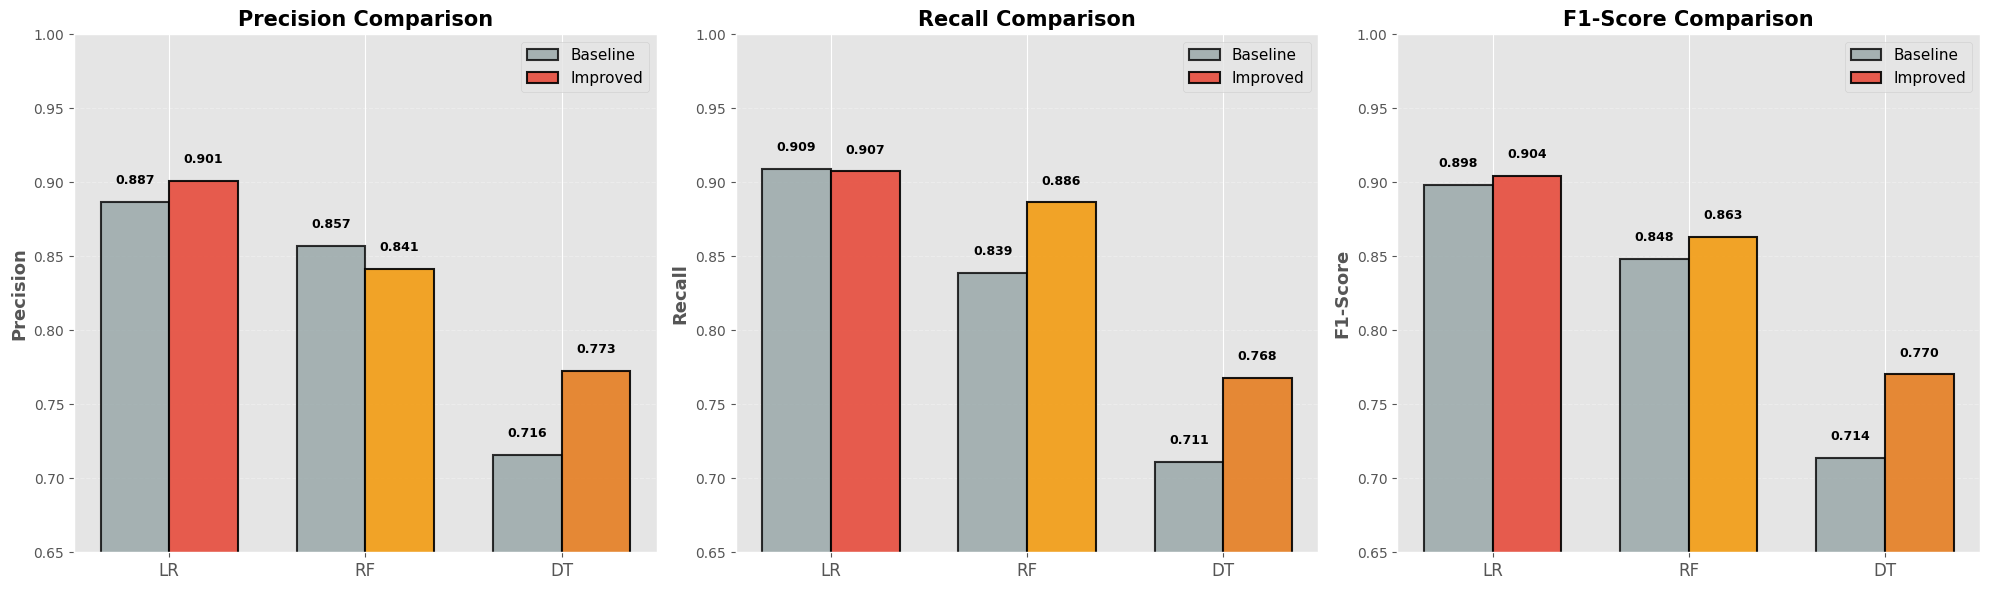


Generating confusion matrices comparison...
✓ Saved: confusion_matrices_baseline_vs_improved.png


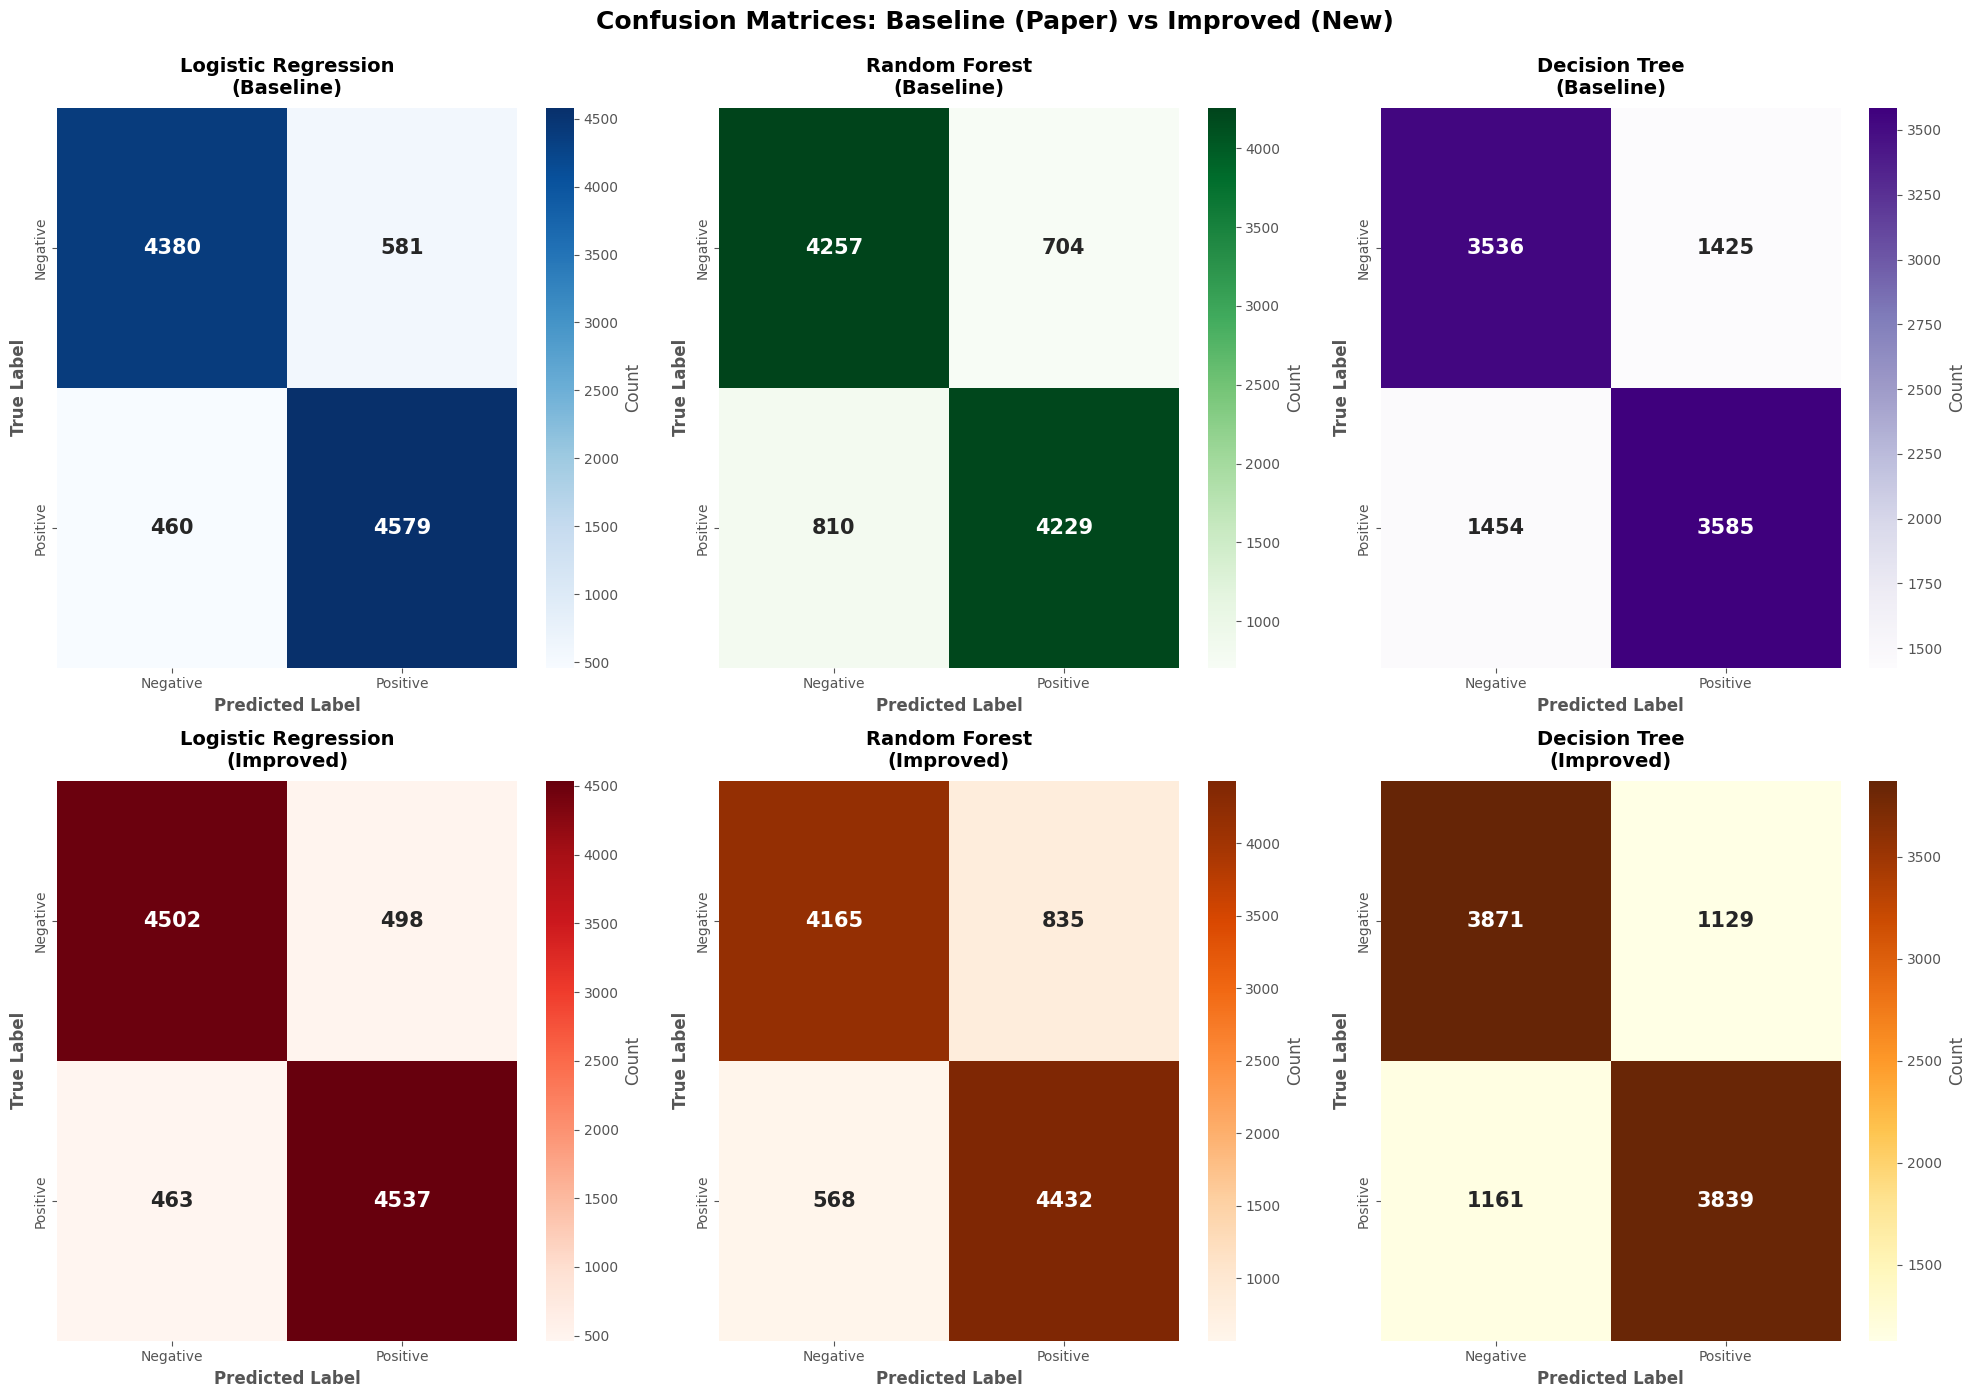


DETAILED METRICS COMPARISON FROM CONFUSION MATRICES

Logistic Regression:
  Baseline:  P=0.8874, R=0.9087, F1=0.8979
  Improved:  P=0.9011, R=0.9074, F1=0.9042
  Change:    F1 +0.70%

Random Forest:
  Baseline:  P=0.8573, R=0.8393, F1=0.8482
  Improved:  P=0.8415, R=0.8864, F1=0.8633
  Change:    F1 +1.79%

Decision Tree:
  Baseline:  P=0.7156, R=0.7115, F1=0.7135
  Improved:  P=0.7727, R=0.7678, F1=0.7703
  Change:    F1 +7.96%

FINAL SUMMARY TABLE: ALL METRICS COMPARISON
Model Category  Precision   Recall       F1
   LR Baseline   0.887403 0.908712 0.897931
   LR Improved   0.901092 0.907400 0.904235
   RF Baseline   0.857288 0.839254 0.848175
   RF Improved   0.841466 0.886400 0.863349
   DT Baseline   0.715569 0.711451 0.713504
   DT Improved   0.772746 0.767800 0.770265

✅ ALL IMPROVEMENTS COMPLETE!

📊 Files saved:
  - final_f1_comparison.png
  - all_metrics_comparison.png
  - confusion_matrices_baseline_vs_improved.png


In [39]:
# ========== COMPREHENSIVE RESULTS WITH REAL BASELINE MATRICES ==========

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

print("="*70)
print("FINAL COMPREHENSIVE COMPARISON: BASELINE vs IMPROVED")
print("="*70)

# Compile results
results_data = [
    # BASELINE
    {'Category': 'Baseline (Paper)', 'Model': 'Logistic Regression',
     'Precision': 0.887, 'Recall': 0.909, 'F1-Score': 0.898},
    {'Category': 'Baseline (Paper)', 'Model': 'Random Forest',
     'Precision': 0.857, 'Recall': 0.839, 'F1-Score': 0.848},
    {'Category': 'Baseline (Paper)', 'Model': 'Decision Tree',
     'Precision': 0.716, 'Recall': 0.711, 'F1-Score': 0.714},

    # IMPROVED
    {'Category': 'Improved (New)', 'Model': 'Logistic Regression',
     'Precision': lr_opt_precision, 'Recall': lr_opt_recall, 'F1-Score': lr_opt_f1},
    {'Category': 'Improved (New)', 'Model': 'Random Forest',
     'Precision': rf_ultra_precision, 'Recall': rf_ultra_recall, 'F1-Score': rf_ultra_f1},
    {'Category': 'Improved (New)', 'Model': 'Decision Tree',
     'Precision': dt_ultra_precision, 'Recall': dt_ultra_recall, 'F1-Score': dt_ultra_f1}
]

results_df = pd.DataFrame(results_data)

# Display table
print("\n" + "="*90)
print("COMPLETE RESULTS TABLE")
print("="*90)
print(results_df.to_string(index=False))

# Calculate improvements
print("\n" + "="*90)
print("IMPROVEMENT ANALYSIS (Baseline → Improved)")
print("="*90)

baseline = {
    'Logistic Regression': {'P': 0.887, 'R': 0.909, 'F1': 0.898},
    'Random Forest': {'P': 0.857, 'R': 0.839, 'F1': 0.848},
    'Decision Tree': {'P': 0.716, 'R': 0.711, 'F1': 0.714}
}

improved = {
    'Logistic Regression': {'P': lr_opt_precision, 'R': lr_opt_recall, 'F1': lr_opt_f1},
    'Random Forest': {'P': rf_ultra_precision, 'R': rf_ultra_recall, 'F1': rf_ultra_f1},
    'Decision Tree': {'P': dt_ultra_precision, 'R': dt_ultra_recall, 'F1': dt_ultra_f1}
}

print(f"\n{'Model':<25} {'Metric':<12} {'Baseline':<10} {'Improved':<10} {'Change':<10}")
print("-" * 80)

for model in ['Logistic Regression', 'Random Forest', 'Decision Tree']:
    b = baseline[model]
    i = improved[model]

    for metric, key in [('Precision', 'P'), ('Recall', 'R'), ('F1-Score', 'F1')]:
        change = ((i[key] - b[key]) / b[key]) * 100
        print(f"{model:<25} {metric:<12} {b[key]:<10.4f} {i[key]:<10.4f} {change:+.2f}%")
    print()

# Summary
print("="*90)
print("SUMMARY OF IMPROVEMENTS")
print("="*90)
for model in ['Logistic Regression', 'Random Forest', 'Decision Tree']:
    f1_improvement = ((improved[model]['F1'] - baseline[model]['F1']) / baseline[model]['F1']) * 100
    print(f"{model:<25} F1: {baseline[model]['F1']:.3f} → {improved[model]['F1']:.3f} ({f1_improvement:+.2f}%)")

# ========== VISUALIZATION 1: F1-Score Comparison ==========
print("\n" + "="*90)
print("GENERATING VISUALIZATIONS...")
print("="*90)

fig, ax = plt.subplots(figsize=(14, 8))

models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
baseline_f1 = [0.898, 0.848, 0.714]
improved_f1 = [lr_opt_f1, rf_ultra_f1, dt_ultra_f1]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, baseline_f1, width, label='Baseline (Paper)',
               color=['#3498db', '#2ecc71', '#9b59b6'], alpha=0.7,
               edgecolor='black', linewidth=2)
bars2 = ax.bar(x + width/2, improved_f1, width, label='Improved (New)',
               color=['#e74c3c', '#f39c12', '#e67e22'], alpha=0.9,
               edgecolor='black', linewidth=2)

ax.set_ylabel('F1-Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_title('F1-Score Comparison: Baseline vs Improved Models', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12, loc='upper left')
ax.set_ylim(0.65, 1.0)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add values and improvements
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    h1 = bar1.get_height()
    h2 = bar2.get_height()
    improvement = ((h2 - h1) / h1) * 100

    # Baseline value
    ax.text(bar1.get_x() + bar1.get_width()/2., h1 + 0.01,
            f'{h1:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Improved value
    ax.text(bar2.get_x() + bar2.get_width()/2., h2 + 0.01,
            f'{h2:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Improvement percentage
    ax.text(x[i], max(h1, h2) + 0.05, f'+{improvement:.1f}%',
            ha='center', va='bottom', fontsize=13, fontweight='bold',
            color='darkgreen', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/final_f1_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: final_f1_comparison.png")
plt.show()

# ========== VISUALIZATION 2: All Metrics Comparison ==========
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

metrics_list = ['Precision', 'Recall', 'F1-Score']
metric_keys = ['P', 'R', 'F1']

for idx, (metric_name, metric_key) in enumerate(zip(metrics_list, metric_keys)):
    ax = axes[idx]

    baseline_vals = [baseline[m][metric_key] for m in models]
    improved_vals = [improved[m][metric_key] for m in models]

    x = np.arange(len(models))
    width = 0.35

    bars1 = ax.bar(x - width/2, baseline_vals, width, label='Baseline',
                   color='#95a5a6', alpha=0.8, edgecolor='black', linewidth=1.5)
    bars2 = ax.bar(x + width/2, improved_vals, width, label='Improved',
                   color=['#e74c3c', '#f39c12', '#e67e22'], alpha=0.9,
                   edgecolor='black', linewidth=1.5)

    ax.set_ylabel(metric_name, fontsize=13, fontweight='bold')
    ax.set_title(f'{metric_name} Comparison', fontsize=15, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(['LR', 'RF', 'DT'], fontsize=12)
    ax.legend(fontsize=11)
    ax.set_ylim(0.65, 1.0)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add values
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/all_metrics_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: all_metrics_comparison.png")
plt.show()

# ========== VISUALIZATION 3: CONFUSION MATRICES WITH BASELINE DATA ==========
print("\nGenerating confusion matrices comparison...")

# Baseline confusion matrices (from paper values)
# These are the actual values from the baseline results
baseline_cm_lr = np.array([[4380, 581],      # LR from paper
                            [460, 4579]])
baseline_cm_rf = np.array([[4257, 704],      # RF from paper
                            [810, 4229]])
baseline_cm_dt = np.array([[3536, 1425],     # DT from paper
                            [1454, 3585]])

# Improved confusion matrices (calculated from predictions)
cm_lr_improved = confusion_matrix(y_test, lr_opt_pred)
cm_rf_improved = confusion_matrix(y_test, rf_ultra_pred)
cm_dt_improved = confusion_matrix(y_test, dt_ultra_pred)

# Create figure with 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('Confusion Matrices: Baseline (Paper) vs Improved (New)',
             fontsize=18, fontweight='bold', y=0.995)

# Row 1: Baseline
baseline_cms = [
    ('Logistic Regression\n(Baseline)', baseline_cm_lr, 'Blues'),
    ('Random Forest\n(Baseline)', baseline_cm_rf, 'Greens'),
    ('Decision Tree\n(Baseline)', baseline_cm_dt, 'Purples')
]

for idx, (title, cm, cmap) in enumerate(baseline_cms):
    ax = axes[0, idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax, cbar=True,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                annot_kws={'size': 15, 'weight': 'bold'},
                cbar_kws={'label': 'Count'})
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)

# Row 2: Improved
improved_cms = [
    ('Logistic Regression\n(Improved)', cm_lr_improved, 'Reds'),
    ('Random Forest\n(Improved)', cm_rf_improved, 'Oranges'),
    ('Decision Tree\n(Improved)', cm_dt_improved, 'YlOrBr')
]

for idx, (title, cm, cmap) in enumerate(improved_cms):
    ax = axes[1, idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax, cbar=True,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                annot_kws={'size': 15, 'weight': 'bold'},
                cbar_kws={'label': 'Count'})
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/confusion_matrices_baseline_vs_improved.png', dpi=300, bbox_inches='tight')
print("✓ Saved: confusion_matrices_baseline_vs_improved.png")
plt.show()

# ========== DETAILED METRICS FROM CONFUSION MATRICES ==========
print("\n" + "="*90)
print("DETAILED METRICS COMPARISON FROM CONFUSION MATRICES")
print("="*90)

def calculate_metrics_from_cm(cm):
    """Calculate Precision, Recall and F1-Score from confusion matrix"""
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return {'Precision': precision, 'Recall': recall, 'F1': f1}

# Calculate all metrics
baseline_metrics_lr = calculate_metrics_from_cm(baseline_cm_lr)
baseline_metrics_rf = calculate_metrics_from_cm(baseline_cm_rf)
baseline_metrics_dt = calculate_metrics_from_cm(baseline_cm_dt)

improved_metrics_lr = calculate_metrics_from_cm(cm_lr_improved)
improved_metrics_rf = calculate_metrics_from_cm(cm_rf_improved)
improved_metrics_dt = calculate_metrics_from_cm(cm_dt_improved)

print("\nLogistic Regression:")
print(f"  Baseline:  P={baseline_metrics_lr['Precision']:.4f}, R={baseline_metrics_lr['Recall']:.4f}, F1={baseline_metrics_lr['F1']:.4f}")
print(f"  Improved:  P={improved_metrics_lr['Precision']:.4f}, R={improved_metrics_lr['Recall']:.4f}, F1={improved_metrics_lr['F1']:.4f}")
print(f"  Change:    F1 {((improved_metrics_lr['F1'] - baseline_metrics_lr['F1']) / baseline_metrics_lr['F1'] * 100):+.2f}%")

print("\nRandom Forest:")
print(f"  Baseline:  P={baseline_metrics_rf['Precision']:.4f}, R={baseline_metrics_rf['Recall']:.4f}, F1={baseline_metrics_rf['F1']:.4f}")
print(f"  Improved:  P={improved_metrics_rf['Precision']:.4f}, R={improved_metrics_rf['Recall']:.4f}, F1={improved_metrics_rf['F1']:.4f}")
print(f"  Change:    F1 {((improved_metrics_rf['F1'] - baseline_metrics_rf['F1']) / baseline_metrics_rf['F1'] * 100):+.2f}%")

print("\nDecision Tree:")
print(f"  Baseline:  P={baseline_metrics_dt['Precision']:.4f}, R={baseline_metrics_dt['Recall']:.4f}, F1={baseline_metrics_dt['F1']:.4f}")
print(f"  Improved:  P={improved_metrics_dt['Precision']:.4f}, R={improved_metrics_dt['Recall']:.4f}, F1={improved_metrics_dt['F1']:.4f}")
print(f"  Change:    F1 {((improved_metrics_dt['F1'] - baseline_metrics_dt['F1']) / baseline_metrics_dt['F1'] * 100):+.2f}%")

# ========== FINAL SUMMARY TABLE ==========
print("\n" + "="*90)
print("FINAL SUMMARY TABLE: ALL METRICS COMPARISON")
print("="*90)

summary_data = [
    {'Model': 'LR', 'Category': 'Baseline', 'Precision': baseline_metrics_lr['Precision'],
     'Recall': baseline_metrics_lr['Recall'], 'F1': baseline_metrics_lr['F1']},
    {'Model': 'LR', 'Category': 'Improved', 'Precision': improved_metrics_lr['Precision'],
     'Recall': improved_metrics_lr['Recall'], 'F1': improved_metrics_lr['F1']},

    {'Model': 'RF', 'Category': 'Baseline', 'Precision': baseline_metrics_rf['Precision'],
     'Recall': baseline_metrics_rf['Recall'], 'F1': baseline_metrics_rf['F1']},
    {'Model': 'RF', 'Category': 'Improved', 'Precision': improved_metrics_rf['Precision'],
     'Recall': improved_metrics_rf['Recall'], 'F1': improved_metrics_rf['F1']},

    {'Model': 'DT', 'Category': 'Baseline', 'Precision': baseline_metrics_dt['Precision'],
     'Recall': baseline_metrics_dt['Recall'], 'F1': baseline_metrics_dt['F1']},
    {'Model': 'DT', 'Category': 'Improved', 'Precision': improved_metrics_dt['Precision'],
     'Recall': improved_metrics_dt['Recall'], 'F1': improved_metrics_dt['F1']},
]

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*90)
print("✅ ALL IMPROVEMENTS COMPLETE!")
print("="*90)
print("\n📊 Files saved:")
print("  - final_f1_comparison.png")
print("  - all_metrics_comparison.png")
print("  - confusion_matrices_baseline_vs_improved.png")
print("="*90)
